# A Glance through COCO
## Presented By R.G.

COCO的官网:https://cocodataset.org/    
COCO API : https://github.com/cocodataset/cocoapi

### 以下是 COCO API 的 README

COCO is a large image dataset designed for object detection, segmentation, person keypoints detection, stuff segmentation, and caption generation. This package provides Matlab, Python, and Lua APIs that assists in loading, parsing, and visualizing the annotations in COCO. Please visit http://cocodataset.org/ for more information on COCO, including for the data, paper, and tutorials. The exact format of the annotations is also described on the COCO website. The Matlab and Python APIs are complete, the Lua API provides only basic functionality.

In addition to this API, please download both the COCO images and annotations in order to run the demos and use the API. Both are available on the project website.
-Please download, unzip, and place the images in: coco/images/
-Please download and place the annotations in: coco/annotations/
For substantially more details on the API please see http://cocodataset.org/#download.

After downloading the images and annotations, run the Matlab, Python, or Lua demos for example usage.

To install:
- For Matlab, add coco/MatlabApi to the Matlab path (OSX/Linux binaries provided)
- For Python, run "make" under coco/PythonAPI
- For Lua, run “luarocks make LuaAPI/rocks/coco-scm-1.rockspec” under coco/

### 配置COCO数据集的路径

In [58]:
import sys,os
# 配置COCO数据集的路径
COCOPATH = os.path.join(os.getcwd(), 'COCO') # 这里配置你COCO数据集的所在路径，我是放在当前文件夹路径内
COCOPATH

'/Users/rgmax/Desktop/COCO_ABC/COCO'

查看路径（文件夹）下内容，可以看到由于是mac的缘故，多了一个'.DS_Store'

In [59]:
os.listdir(COCOPATH) 

['image_info_test2017',
 '.DS_Store',
 'val2017',
 'panoptic_annotations_trainval2017',
 'test2017',
 'stuff_annotations_trainval2017',
 'unlabeled2017',
 'annotations_trainval2017',
 'train2017',
 'image_info_unlabeled2017']

剔除mac自带的.DS_Store文件夹，并将COCO数据集所含的所有文件夹路径保存在COCODIRS字典中

In [60]:
COCODIRS = os.listdir(COCOPATH)
try: # 剔除mac自带的.DS_Store文件夹
    COCODIRS.remove('.DS_Store')
except:
    pass
# COCODIRS = [os.path.join(COCOPATH, d) for d in COCODIRS] # 生成完整文件夹路径
COCODIRS = {  # 改用字典比较好访问
    d : os.path.join(COCOPATH, d) for d in COCODIRS
}
COCODIRS

{'image_info_test2017': '/Users/rgmax/Desktop/COCO_ABC/COCO/image_info_test2017',
 'val2017': '/Users/rgmax/Desktop/COCO_ABC/COCO/val2017',
 'panoptic_annotations_trainval2017': '/Users/rgmax/Desktop/COCO_ABC/COCO/panoptic_annotations_trainval2017',
 'test2017': '/Users/rgmax/Desktop/COCO_ABC/COCO/test2017',
 'stuff_annotations_trainval2017': '/Users/rgmax/Desktop/COCO_ABC/COCO/stuff_annotations_trainval2017',
 'unlabeled2017': '/Users/rgmax/Desktop/COCO_ABC/COCO/unlabeled2017',
 'annotations_trainval2017': '/Users/rgmax/Desktop/COCO_ABC/COCO/annotations_trainval2017',
 'train2017': '/Users/rgmax/Desktop/COCO_ABC/COCO/train2017',
 'image_info_unlabeled2017': '/Users/rgmax/Desktop/COCO_ABC/COCO/image_info_unlabeled2017'}

### 构建训练集对象train_set

In [61]:
# 构建训练集
train_set = [os.path.join(COCODIRS['train2017'],p) for p in os.listdir(COCODIRS['train2017'])]
train_set[:5] # 查看部分训练集（图片）

['/Users/rgmax/Desktop/COCO_ABC/COCO/train2017/000000109622.jpg',
 '/Users/rgmax/Desktop/COCO_ABC/COCO/train2017/000000160694.jpg',
 '/Users/rgmax/Desktop/COCO_ABC/COCO/train2017/000000308590.jpg',
 '/Users/rgmax/Desktop/COCO_ABC/COCO/train2017/000000327573.jpg',
 '/Users/rgmax/Desktop/COCO_ABC/COCO/train2017/000000062929.jpg']

### 构建验证集对象val_set

In [62]:
val_set = [os.path.join(COCODIRS['val2017'],p) for p in os.listdir(COCODIRS['val2017'])]
val_set[:5]

['/Users/rgmax/Desktop/COCO_ABC/COCO/val2017/000000182611.jpg',
 '/Users/rgmax/Desktop/COCO_ABC/COCO/val2017/000000335177.jpg',
 '/Users/rgmax/Desktop/COCO_ABC/COCO/val2017/000000278705.jpg',
 '/Users/rgmax/Desktop/COCO_ABC/COCO/val2017/000000463618.jpg',
 '/Users/rgmax/Desktop/COCO_ABC/COCO/val2017/000000568981.jpg']

下面是一个图像通道转换函数

### 随便加载一张训练集和验证集的一张图片看看

In [63]:
# 为了方便图片直接显示在jupyter中，cv的imshow不能直接在jupyter中显示
# 为了用matplotlib显示（ 不能用plt.show()，要用plt.imshow() ）
# 由于CV的通道是BGR顺序，而matpotlib是 RGB顺序，这里要做通道转换
# 方法一
def bgr2rgb_v2(img):
    # 用cv自带的分割和合并函数
    B,G,R = cv.split(img)
    return cv.merge([R,G,B])
# 方法二
def bgr2rgb(img):
    # 直接用python切片特性，[start: end: step], 这里start end为空，则默认遍历全部，step为-1则倒序遍历
    return img[:, :, ::-1]

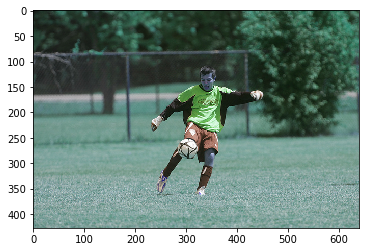

In [64]:
from matplotlib import pyplot as plt
from cv2 import cv2 as cv
img = cv.imread(train_set[1], cv.IMREAD_UNCHANGED) # 随便加载数据集的一张图
# 注意cv的通道顺序和matplotlib的不一样，下面是未转换成RGB顺序
plt.imshow(img)

上图是通道未转换正确的显示效果，以下是正确转换了通道的展示效果

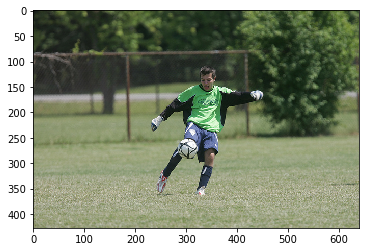

In [65]:
img = bgr2rgb(img)
plt.imshow(img)

再加载一张验证集的图片看看

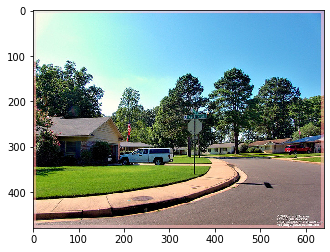

In [66]:
img = cv.imread(val_set[1],cv.IMREAD_UNCHANGED)
plt.imshow(bgr2rgb(img))

## 获取图片的标签/注（annotation）信息

查看annotations_trainval2017文件夹内容

In [67]:
os.listdir(COCODIRS['annotations_trainval2017']) # 查看annotations_trainval2017文件夹内容

['person_keypoints_val2017.json',
 'captions_val2017.json',
 'instances_val2017.json',
 'person_keypoints_train2017.json',
 'instances_train2017.json',
 'captions_train2017.json']

加载annotations文件(这里加载instances_val2017.json)，生成COCO对象

In [68]:
import numpy as np 
from pycocotools.coco import COCO
import json
annFile = os.path.join(COCODIRS['annotations_trainval2017'], 'instances_val2017.json')
# with open(annFile,'r') as fp: # 这段注释，原本是直接加载json，看看里面的内容
#     a = json.load(fp)
# a
coco = COCO(annFile) # 初始化生成COCO对象

loading annotations into memory...
Done (t=0.73s)
creating index...
index created!


In [69]:
coco # 生成的COCO对象

In [70]:
# coco.getCatIds() # 此函数用于获取加载对象所包含的所有类别的id（即category 的序号）
# coco.getAnnIds() # 获取加载对象所包含的所有标记信息（就是所有图片的Segmentation，即分割的坐标数据）
# coco.getImgIds() # 获取所有 标记所对应的原图id

### 下面代码，获取的是所有的 类别（category）信息

In [71]:
categories = coco.loadCats(coco.getCatIds()) # loadCats()需要传入 需加载的类别id序列（catIds）
categories[:10] # 为了输出美观，这是仅展示10条数据

[{'supercategory': 'person', 'id': 1, 'name': 'person'},
 {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'},
 {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'},
 {'supercategory': 'vehicle', 'id': 7, 'name': 'train'},
 {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'},
 {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'},
 {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'}]

可以看到`loadCats()`返回了一个list，每条数据为dict类型，包含了数据的 'supercategory'、'id'、'name' 信息 

其中，id为category的编号；name为该数据划分的类别，即category的名称；而supercategory为该category的上一级父类。

### 单独获取 类别名称（category name）

In [72]:
names = [cat['name'] for cat in categories]
names[:10]

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light']

### 获取指定名称的类别序号（找category name为 x 的 category id）

这里获取 类别名为 person、bicycle、bus所对应的类别id，可以看到输出结果是：
+ person类别序号为1
+ bicycle 2
+ bus 6

In [73]:
catIds = coco.getCatIds(catNms=['person', 'bicycle', 'bus'])
catIds

[1, 2, 6]

下面是获取所有符合catIds的图片id，即上面我们得到 person类别序号为1，bicycle 2，bus 6，那么也就是获取图片中含有这三个类别的 图片对应的id

In [74]:
imgIds = coco.getImgIds(catIds=catIds)
imgIds

[76416,
 338625,
 210273,
 184324,
 125572,
 356612,
 350023,
 350122,
 492077,
 309391,
 563604,
 429109,
 319607,
 306136,
 210394,
 254814,
 233727]

从上面符合条件的所有图片序号中随机选取（这里用numpy的随机函数）一个图片，通过loadImgs()加载该图片的信息

In [75]:
img_info = coco.loadImgs(imgIds[np.random.randint(0, len(imgIds))])
img_info

[{'license': 3,
  'file_name': '000000254814.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000254814.jpg',
  'height': 480,
  'width': 640,
  'date_captured': '2013-11-16 11:56:41',
  'flickr_url': 'http://farm1.staticflickr.com/127/373360820_3fc68d5446_z.jpg',
  'id': 254814}]

可以看到`loadImgs()`返回的是一个list，其每条元素是对应的一个图片的具体信息，由于我们这里需要的是一个图片信息，所以用下面的方法，提取出第一条信息

In [76]:
# img_info = coco.loadImgs(imgIds[np.random.randint(0, len(imgIds))])[0]
img_info = img_info[0]
img_info

{'license': 3,
 'file_name': '000000254814.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000254814.jpg',
 'height': 480,
 'width': 640,
 'date_captured': '2013-11-16 11:56:41',
 'flickr_url': 'http://farm1.staticflickr.com/127/373360820_3fc68d5446_z.jpg',
 'id': 254814}

可以看到获得的图片信息包括：
+ license
+ file_name
+ coco_url
+ height
+ width
+ date_captured
+ flickr_url
+ id

### 让我们加载显示该图片

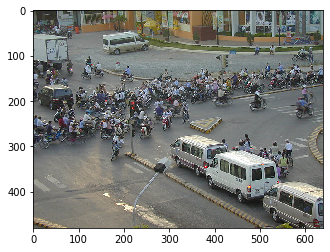

In [77]:
imgPath = val_set[val_set.index(os.path.join(COCODIRS['val2017'],img_info['file_name']))]
img = cv.imread(imgPath)
plt.imshow(bgr2rgb(img))

### 获取该图片的所有标注的id

通过imgIds指定需要获取标注的图片，catIds指定需要获取的标注的类别，关于iscrowd参数稍后测试说明

In [57]:
annIds = coco.getAnnIds(imgIds=img_info['id'], catIds=catIds,iscrowd=None)
annIds

[127156, 258302]

In [78]:
annIds_iscrowd = coco.getAnnIds(imgIds=img_info['id'], catIds=catIds)
annIds_iscrowd

[241548,
 241697,
 241832,
 1227547,
 1245194,
 1245973,
 1250665,
 1261300,
 1286013,
 1308847,
 1313221,
 1314263,
 1319984,
 1333903,
 1336135,
 1336467,
 1336923,
 1711394,
 1736016,
 1766392,
 2009183,
 2050289,
 900100254814]

可以看到删除`iscrowd=None`参数之后，获得的标注id数目变多了

![iscrowd](./imgs/iscrowd.png)

上图是`getAnnIds()`用法提示，可以看到`iscrowd`参数用于获取给定的人群标签

### 用loadAnns()加载标记

可以看到加载得到的是一个list，记录了每个segmentation(分割)在图片中的坐标位置以及其他信息

In [79]:
anns = coco.loadAnns(annIds)
anns

[{'segmentation': [[81.03,
    78.28,
    101.63,
    97.51,
    104.38,
    122.23,
    107.12,
    124.98,
    115.36,
    123.61,
    134.59,
    118.11,
    142.83,
    115.36,
    146.95,
    134.59,
    123.61,
    178.54,
    113.99,
    218.37,
    104.38,
    233.48,
    96.14,
    222.49,
    96.14,
    193.65,
    100.26,
    174.42,
    98.88,
    146.95,
    85.15,
    129.1,
    79.66,
    96.14]],
  'area': 4193.931099999998,
  'iscrowd': 0,
  'image_id': 432553,
  'bbox': [79.66, 78.28, 67.29, 155.2],
  'category_id': 2,
  'id': 127156},
 {'segmentation': [[295.5,
    278.92,
    298.38,
    382.7,
    314.23,
    424.5,
    386.31,
    454.77,
    386.31,
    473.51,
    360.36,
    500.9,
    328.65,
    516.76,
    294.05,
    519.64,
    272.43,
    498.02,
    243.6,
    424.5,
    233.51,
    352.43,
    207.57,
    293.33,
    203.24,
    234.23,
    204.68,
    196.76,
    204.68,
    166.49,
    210.45,
    127.57,
    217.66,
    104.5,
    250.81,
    81.44,


加载一下annIds_iscrowd看看

In [81]:
anns_iscrowd = coco.loadAnns(annIds_iscrowd)
# anns_iscrowd # 这里就不输出了，太长了

### 在图片中显示标注的类别

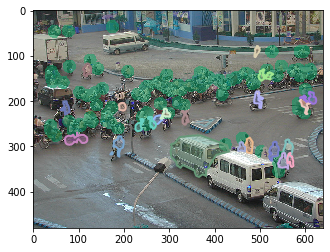

In [83]:
# annIds = coco.getAnnIds(imgIds=img_info['id'], catIds=catIds,iscrowd=None)
# anns = coco.loadAnns(annIds) # 为了显示这两句的作用，上面单独跑了
plt.imshow(img)
# plt.axis('off') # 该语句可以关闭坐标轴
coco.showAnns(anns) # 运行这条之前必须有 plt.imshow(img)之类的把原图show出来的语句，必须在同一个cell里运行

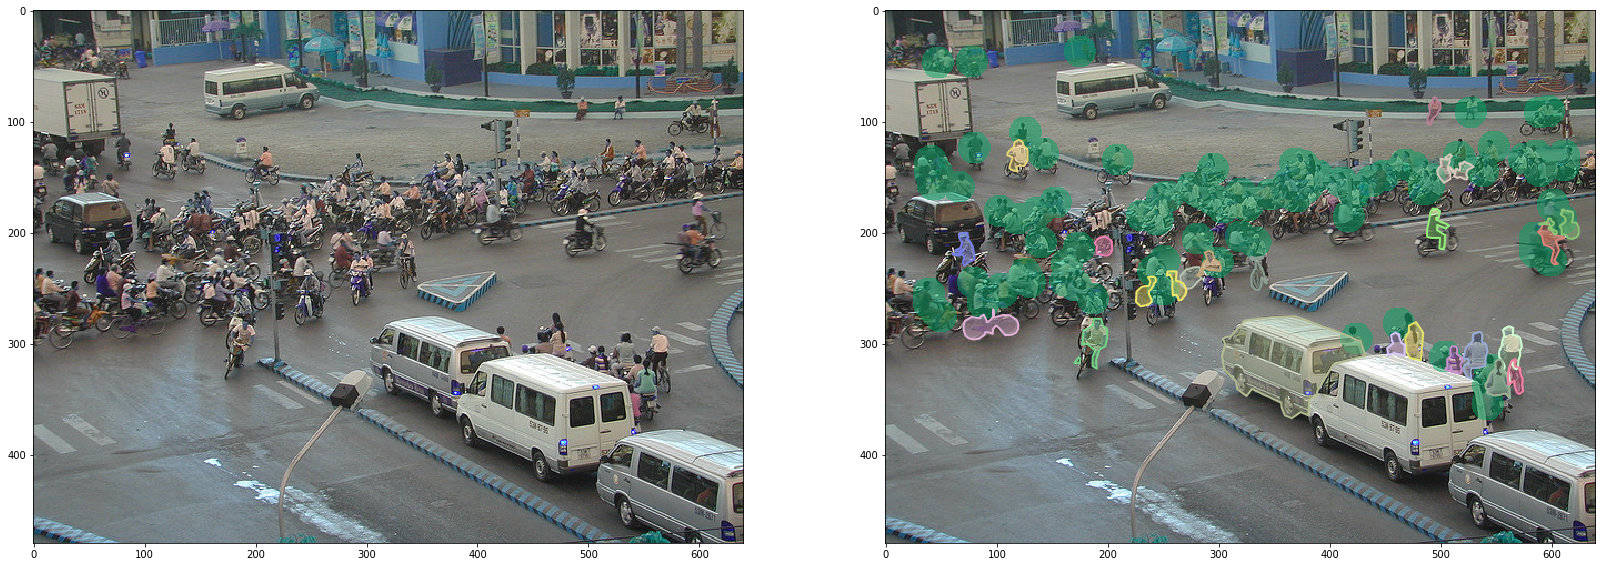

In [87]:
s = 7
plt.figure(figsize=(4*s,3*s))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(img)
coco.showAnns(anns)

参考资料：
+ https://blog.csdn.net/gzj2013/article/details/82385164